# Smith MFIT 867 "Predictive Analytics"

**Session 1: regression, "Sarah Gets a Diamond" case**

This notebook provides the code for building several regression models for the "Sarah Gets a Diamond case". These models grow in complexity (and hence also in performance) and one can categorize them into two groups: (i) basic+ regressions, (ii) advanced regressions.  

The **basic+** part of the code contains the following steps:

1.   Getting ready: load (install, if needed) the required packages and libraries
2.   Data engineering: (i) load the data and "clean" it, (ii) create dummy variables ('one-hot encoding') (iii) split the data into training (ID<=6000) and prediction (ID>=6001), (iv) define the vector of depdent variable (Price) and (v) define the matrix of independent variables (all others, excl. ID).
3.   Call the functions for linear regression and build ("train" or "fit" or "learn") a model
4.   Check the model quality with out-of-sample predictions ("cross-validation")
5.   Check the model quality with diagnostic plots
6.   Use the trained model to predict the prices (or "score") the new diamonds
7.   Export the model predictions

Once we build this basic setup, we will borrow intuition from the Tableau visualizations that we will see in class, generate new features, repeat steps 3 and 4, and see how they can improve the model.

The **advanced regression** part utilizes the concept of Regularization, and specifically, considers Lasso and Ridge regressions. For that, we will generate "too many" features that will make the model overly complex, and then apply regularization to reduce the model complexity and improve performance.

As we will see, Lasso and Ridge models (as well as many other machine learning models that we will consider later in the course) rely on hyperparameters. We will learn how to optimize them through cross-validation.

# 1. Getting Ready

This notebook will use several third-party libraries. They are not installed with Python by default, however, if you use Colab or install the Anaconda (https://www.anaconda.com/) distribution, then they will be installed together with Python and you can just skip Step 1.1 below.

1. Numpy. This is a de-facto standard library for numerical operations in Python, documentation is available at https://numpy.org/doc/
2. Pandas. It is most commonly used library for data engineering, https://pandas.pydata.org
3. Scikit-Learn. This one contains the majority of  machine-learning algorithms ready to be applied out of box, https://scikit-learn.org/stable/
4. Statsmodels. Library for statistical analyses and models, https://www.statsmodels.org/stable/index.html.
5. Matplotlib. Provides plotting functionality in Python, https://matplotlib.org


In [1]:
# Step 1.1: Check conda environment and installed packages and libaries
# import sys
# !conda env list
# !conda list

# Installation with Conda Installer:
# !conda install pandas # library pandas is included in the numpy package
# !conda install scikit-learn
# !conda install statsmodels
# !conda install matplotlib

# alternatively: Installation with Pip Installer:
# !pip3 install numpy pandas sklearn statsmodels matplotlib

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Step 1.2:Loading libraries pandas and numpy and giving them short names pd and np. These aliases are industry-standard.
import pandas as pd
import numpy as np

# 2. Data Engineering

In [2]:
# Step 2.1: Load the data

# For local machine -- read the provided CSV datafile into a dataframe and name it Sarah_raw_data Note: instead of "C:\\Users\\ao37\\" you need to paste the path to where you saved the file

#import os
#current_directory = os.getcwd()
#print(current_directory)

Sarah_raw_data = pd.read_csv("01 CSV data -- Sarah Gets a Diamond.csv", sep = ',')

# For google collab -- first upload to the cloud, then read it into a dataframe and name it Sarah_raw_data

#from google.colab import files

# Upload file from your local file system
#uploaded = files.upload()

#filename = list(uploaded.keys())[0]  # This gets the name of the uploaded file
#Sarah_raw_data = pd.read_csv(Sarah_raw_data, sep = ',') # Now 'Sarah_raw_data' is a Pandas DataFrame containing the contents of the uploaded file

# Now 'df' is a Pandas DataFrame containing the contents of the uploaded file
#Sarah_raw_data[0:10] # Display first 10 rows of data (in Python numbering starts with 0, hence these are rows 0 through 9)

In [3]:
# Step 2.2: Creating dummy variables (in machine learning this is called "one-hot encoding")
Sarah_data = pd.get_dummies(data=Sarah_raw_data, columns = ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report'], drop_first=True)

Sarah_data[0:10] # Display first 10 rows of data (rows 0 through 9)

,ID,Carat Weight,Price,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1,1.10,5169.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2,0.83,3470.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,3,0.85,3183.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,0.91,4370.0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
4,5,0.83,3171.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,6,1.53,12791.0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
6,7,1.00,5747.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
7,8,1.50,10450.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
8,9,2.11,18609.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
9,10,1.05,7666.0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,1,0,0,1


In [5]:
# Step 2.3: From the case, the first 6000 rows contain prices and can be used for training. The rest do not and are to be used for predictions

Sarah_data_training = Sarah_data[:6000] # Dataframe Sarah_data_training contains the data about the first 6000 diamonds
Sarah_data_prediction = Sarah_data[6000:] # Dataframe Sarah_data_prediction contains the data about the rest

In [6]:
# Step 2.4: Define the vector of Y ("dependent") variable -- Price; we will build the model to predict Y

Y_train = Sarah_data_training[(['Price'])]

Y_train[0:4] # Display first 4 values of the Y vector

,Price
0,5169.0
1,3470.0
2,3183.0
3,4370.0


In [7]:
# Step 2.5: Define the matrix of X ("independent") variables that we will use to predict Y; drop ID and Price as they should not / cannot be used for prediction
X_train = Sarah_data_training.drop(['ID','Price'], axis=1)

X_train[0:4] # Display first 4 rows of the X matrix

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1.10,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,0.83,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,0.85,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.91,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


# 3. Build ("train" or "fit") our first linear model

In [9]:
# There are several ways to run a linear regressoin in python.
# One way is using the statsmodels package

# Import the package, give it a short name "sm" for ease of use
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train) # In this package, by default, the regression will have no intercept, hence we need to manually add it to the X matrix, and call the result X_sm

lm = sm.OLS(Y_train, X_train_sm.astype(float)).fit() # Fit/"train"/"learn" a linear regression ("ordinary least squares", OLS) with vector Y as dependent and matrix X_sm as independent

lm.summary() # Display the summary of model results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1645.
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:05:12   Log-Likelihood:                -57908.
No. Observations:                6000   AIC:                         1.159e+05
Df Residuals:                    5976   BIC:                         1.160e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.642e+04   1954.801     13.517      0.000    2.26e+04    3.03e+04
Carat Weight         1.839e+04    105.110    175.005      0.000    1.82e+04    1.86e+04
Cut_Good             -322.5957    362.520     -0.890      0.374   -1033.265     388.074
Cut_Ideal             274.6927    355.384      0.773      0.440    -421.988     971.373
Cut_Signature-Ideal  1677.1908    439.716      3.814      0.000     815.189    2539.193
Cut_Very Good         -35.6357    345.517     -0.103      0.918    -712.973     641.702
Color_E             -2327.3317    200.473    -11.609      0.000   -2720.331   -1934.332
Color_F             -3078.2407    189.816    -16.217      0.000   -3450.349   -2706.132
Color_G             -4799.5517    178.263    -26.924      0.000   -5149.012   -4450.092
Color_H             -6361.2739    188.072    -33.824      0.000   -6729.963   -5992.584
Color_I             -8039.9918    192.814    -41.698      0.000   -8417.977   -7662.006
Clarity_IF          -2.709e+04   1912.086    -14.170      0.000   -3.08e+04   -2.33e+04
Clarity_SI1          -3.69e+04   1898.452    -19.436      0.000   -4.06e+04   -3.32e+04
Clarity_VS1         -3.397e+04   1899.196    -17.887      0.000   -3.77e+04   -3.02e+04
Clarity_VS2         -3.531e+04   1898.911    -18.596      0.000    -3.9e+04   -3.16e+04
Clarity_VVS1        -3.058e+04   1909.252    -16.014      0.000   -3.43e+04   -2.68e+04
Clarity_VVS2        -3.243e+04   1901.916    -17.053      0.000   -3.62e+04   -2.87e+04
Polish_G                1.4906    201.753      0.007      0.994    -394.018     396.999
Polish_ID            -584.7362    744.971     -0.785      0.433   -2045.148     875.676
Polish_VG            -156.7413    126.621     -1.238      0.216    -404.964      91.482
Symmetry_G           -430.4773    188.917     -2.279      0.023    -800.822     -60.132
Symmetry_ID           148.1049    772.420      0.192      0.848   -1366.118    1662.328
Symmetry_VG          -291.3244    133.555     -2.181      0.029    -553.141     -29.508
Report_GIA            184.3296    347.567      0.530      0.596    -497.027     865.687
==============================================================================
Omnibus:                     4389.321   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           149885.754
Skew:                           3.118   Prob(JB):                         0.00
Kurtosis:                      26.678   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Another way is using the scikit.learn (sklearn) -- a super-powerful library for machine learning that we will also use later in the course

# Import the linear regression package from sklearn
from sklearn.linear_model import LinearRegression

lm_sklearn = LinearRegression().fit(X_train, Y_train) # Fit/"train"/"learn" a linear regression with vector Y as dependent and matrix X as independent

print("Intercept = ",lm_sklearn.intercept_) # Print the resultant/estimated/"learned" model intercept

print("Model coefficients = ", lm_sklearn.coef_) # Print the resultant/estimated/"learned" model coefficients (in order of variables in X)

print("R^2 =",lm_sklearn.score(X_train,Y_train)) # Print the resultant/estimated/"learned" model R-squared

# Note: there is no easy way to obtain other model outputs (p-values, etc.) from sklearn, as these outputs are not present in other, non-regression, machine learning models

Intercept =  [26423.89481315]
Model coefficients =  [[ 1.83948330e+04 -3.22595688e+02  2.74692681e+02  1.67719076e+03
  -3.56356533e+01 -2.32733175e+03 -3.07824070e+03 -4.79955175e+03
  -6.36127388e+03 -8.03999181e+03 -2.70937885e+04 -3.68981919e+04
  -3.39709797e+04 -3.53125448e+04 -3.05753935e+04 -3.24342346e+04
   1.49058530e+00 -5.84736225e+02 -1.56741252e+02 -4.30477274e+02
   1.48104862e+02 -2.91324371e+02  1.84329597e+02]]
R^2 = 0.8635908847404312


# So, our first (linear) model has been built

It gives us a formula into which we substitute the characteristics of the a diamond to obtain the prediction of its price: Price = 26423 + 18394 * Carat Weight - 322 if Cut is Good + 274 if Cut is Ideal + ...

# However, how good is this model? How to check that?

We will look into this question in three ways:

1.   plot the predictions and see if they "make sense"
2.   generate and plot the model diagnostic plots [we will not do this in the FAIM course]
3.   compute the cross-validated error metric(s)







<function matplotlib.pyplot.show(close=None, block=None)>

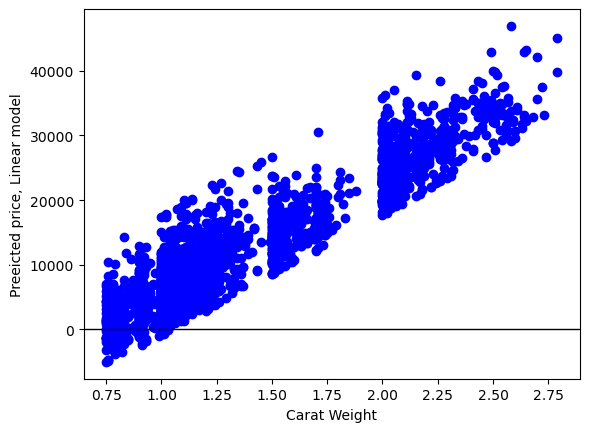

In [16]:
# Quality check 1: plot the predictions and see if they "make sense"

Sarah_data_prediction = Sarah_data[6000:] # Define the prediction data

X_pred = Sarah_data_prediction.drop(['ID', 'Price'], axis = 1)
X_pred = sm.add_constant(X_pred)
Y_pred = lm.predict(X_pred.astype(float))

# Import a plotting package, and give it a short name plt
import matplotlib.pyplot as plt

plt.scatter(X_pred['Carat Weight'], Y_pred, color='blue') # predicted prices vs their carat weights
plt.ylabel('Preeicted price, Linear model') # vertical axis title
plt.xlabel('Carat Weight') # horizontal axis title
#plt.plot([3, 0], [0, 3])
plt.axhline(y = 0, color='black', lw=1)

plt.show

# So do the predicted prices make sense?

In [21]:
# There is also a more formal graphical/visual model check called model diagnostic plots. Source: https://www.statsmodels.org/devel/examples/notebooks/generated/linear_regression_diagnostics_plots.html.

import statsmodels
import statsmodels.formula.api as smf
# import pandas as pd

# import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
# import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'    #refer to plt.style.available

class LinearRegDiagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Authors:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.

        Matt Spinelli (m3spinelli@gmail.com, where 3 = r)
        (1) Fixed incorrect annotation of the top most extreme residuals in
            the Residuals vs Fitted and, especially, the Normal Q-Q plots.
        (2) Changed Residuals vs Leverage plot to match closer the y-axis
            range shown in the equivalent plot in the R package ggfortify.
        (3) Added horizontal line at y=0 in Residuals vs Leverage plot to
            match the plots in R package ggfortify and base R.
        (4) Added option for placing a vertical guideline on the Residuals
            vs Leverage plot using the rule of thumb of h = 2p/n to denote
            high leverage (high_leverage_threshold=True).
        (5) Added two more ways to compute the Cook's Distance (D) threshold:
            * 'baseR': D > 1 and D > 0.5 (default)
            * 'convention': D > 4/n
            * 'dof': D > 4 / (n - k - 1)
        (6) Fixed class name to conform to Pascal casing convention
        (7) Fixed Residuals vs Leverage legend to work with loc='best'
    """

    def __init__(self, results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)
        self.nresids = len(self.residual_norm)

    def __call__(self, plot_context='seaborn-paper', **kwargs):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(
                ax=ax[1,1],
                high_leverage_threshold = kwargs.get('high_leverage_threshold'),
                cooks_threshold = kwargs.get('cooks_threshold'))
            plt.show()

        return self.vif_table(), fig, ax,

    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.argsort(residual_abs), 0)
        abs_resid_top_3 = abs_resid[:3]
        for i in abs_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        fig = QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for i, x, y in self.__qq_top_resid(QQ.theoretical_quantiles, abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(x, y),
                ha='right',
                color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')

        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None, high_leverage_threshold=False, cooks_threshold='baseR',
                      set_ylim=False, set_xlim=False):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        factors = []
        if cooks_threshold == 'baseR' or cooks_threshold is None:
            factors = [1, 0.5]
        elif cooks_threshold == 'convention':
            factors = [4/self.nresids]
        elif cooks_threshold == 'dof':
            factors = [4/ (self.nresids - self.nparams)]
        else:
            raise ValueError("threshold_method must be one of the following: 'convention', 'dof', or 'baseR' (default)")
        for i, factor in enumerate(factors):
            label = "Cook's distance" if i == 0 else None
            xtemp, ytemp = self.__cooks_dist_line(factor)
            ax.plot(xtemp, ytemp, label=label, lw=1.25, ls='--', color='red')
            ax.plot(xtemp, np.negative(ytemp), lw=1.25, ls='--', color='red')

        if high_leverage_threshold:
            high_leverage = 2 * self.nparams / self.nresids
            if max(self.leverage) > high_leverage:
                ax.axvline(high_leverage, label='High leverage', ls='-.', color='purple', lw=1)

        ax.axhline(0, ls='dotted', color='black', lw=1.25)
        if set_xlim:
            ax.set_xlim(0, max(self.leverage)+0.01)
        if set_ylim:
            ax.set_ylim(min(self.residual_norm)-0.1, max(self.residual_norm)+0.1)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        plt.legend(loc='best')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        return (vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y


    def __qq_top_resid(self, quantiles, top_residual_indices):
        """
        Helper generator function yielding the index and coordinates
        """
        offset = 0
        quant_index = 0
        previous_is_negative = None
        for resid_index in top_residual_indices:
            y = self.residual_norm[resid_index]
            is_negative = y < 0
            if previous_is_negative == None or previous_is_negative == is_negative:
                offset += 1
            else:
                quant_index -= offset
            x = quantiles[quant_index] if is_negative else np.flip(quantiles, 0)[quant_index]
            quant_index += 1
            previous_is_negative = is_negative
            yield resid_index, x, y

We next apply this code to the model we created
This will allow us to generate four plots:
*   the residual plot,
*   the qq-plot,
*   the scale-location plot,
*   and the residuals vs leverage.
*   as well as the Variance Inflation Factor (VIF) table

For full description see: https://www.statsmodels.org/devel/examples/notebooks/generated/linear_regression_diagnostics_plots.html

Note: this code is an attempt to recreate what R command plot(model) will do

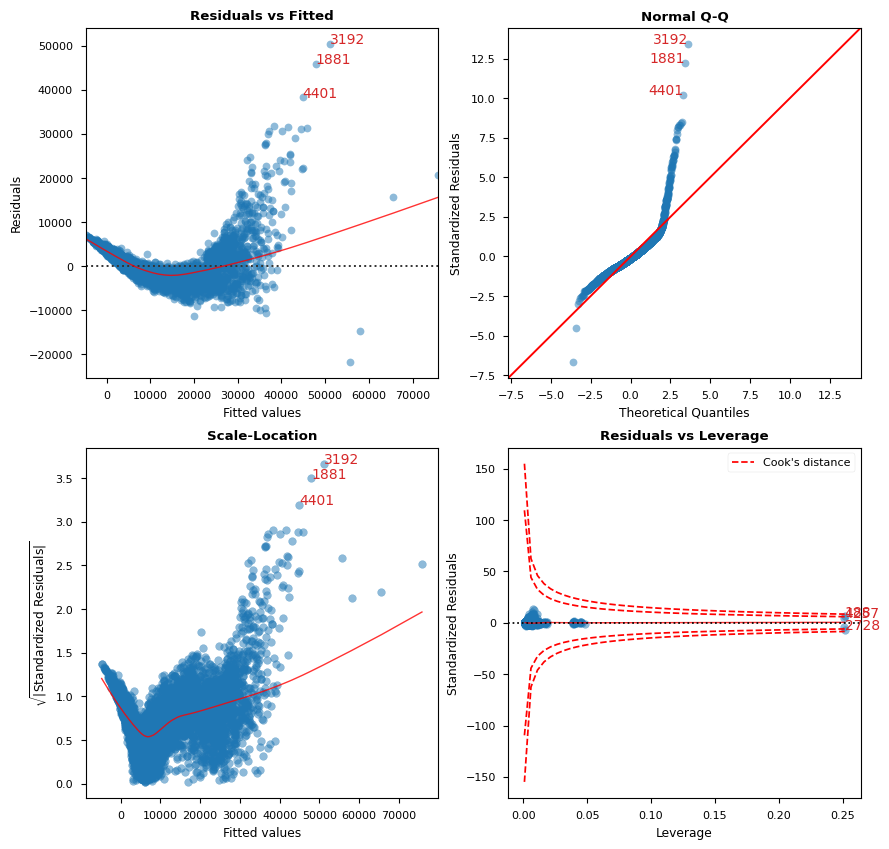

               Features  VIF Factor
1          Carat Weight        1.06
17             Polish_G        1.48
19            Polish_VG        1.63
22          Symmetry_VG        1.81
6               Color_E        1.92
20           Symmetry_G        1.95
10              Color_I        2.13
7               Color_F        2.14
9               Color_H        2.20
8               Color_G        2.52
4   Cut_Signature-Ideal        3.30
23           Report_GIA        5.48
2              Cut_Good        5.78
5         Cut_Very Good       12.15
3             Cut_Ideal       12.94
18            Polish_ID       20.94
21          Symmetry_ID       22.95
11           Clarity_IF       54.32
15         Clarity_VVS1       69.67
16         Clarity_VVS2      150.79
13          Clarity_VS1      242.58
14          Clarity_VS2      294.90
12          Clarity_SI1      343.19
0                 const     1614.28


In [41]:
cls = LinearRegDiagnostic(lm)
vif, fig, ax = cls()
print(vif)

# The variance inflation factor (VIF), is a measure of multicollinearity.
# VIF > 5 for a variable indicates that it is highly collinear with the other input variables.

## So what can we conclude from these diagnostic plots?

Overall: the model is not great. We observe heteroskedasticity, major deviations from normality of residuals, and some infuential outliers (note: the residuals vs leverage plot that Python produces seems wrong; we will see the R plot which it tries to replicate in class)

# 4. Cross-validation

How good is our model? The main machine learning principle that allows to answer this question -- cross-validation: splitting the data into training and testing subsets, training on the former and testing on the latter. Below (since this is our first time doing this) we will split ("fold") once and just by ID. Commonly, 5-10 folds are used with stratified random splits.

In [22]:
# Redefine the training data. Instead of 6000, out the first 5000 diamonds into a training
train = Sarah_data.iloc[:5000]

train[0:4]

,ID,Carat Weight,Price,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1,1.10,5169.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2,0.83,3470.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,3,0.85,3183.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,0.91,4370.0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1


In [23]:
test = Sarah_data.iloc[5000:6000] # Define the testing data: i,e., ID 5001-6000

test[0:4]

,ID,Carat Weight,Price,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
5000,5001,1.00,8151.0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
5001,5002,1.02,6704.0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,1
5002,5003,1.50,13603.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5003,5004,0.91,4466.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [24]:
# Redefine X and Y for the training and testing data

Y_train = train[(['Price'])]
X_train = train.drop(['ID', 'Price'], axis = 1)

# IMPORTANT -- the vector Y_test contains the actual prices of diamonds in the testing set; we will compare our model predictions to them to calculate the error metric

Y_test = test[(['Price'])]
X_test = test.drop(['ID', 'Price'], axis = 1)

Y_test[0:4] # Actual prices for diamonds in the testing set (8151 dollars, 6704 dollars, etc.)

,Price
5000,8151.0
5001,6704.0
5002,13603.0
5003,4466.0


In [25]:
# Fit/"train"/"learn" a linear regression on the training data
lm = LinearRegression().fit(X_train, Y_train)

# Use the trained model to predict the prices for the testing data. Call the vector of predicted prices Y_pred
Y_pred = lm.predict(X_test)

Y_pred[0:4] # Display the predicted price for the first 4 diamonds in the testing data (8042 dollars, 7426 dollars, etc.)

array([[ 8042.42186849],
       [ 7426.03576672],
       [16717.56158277],
       [ 5971.23447045]])

In [26]:
# Finally, calculate the metric for the model quality. As we discussed in class, there are many possible metrics, one of them is MAPE (mean absolute percentage error) https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

percent_errors = np.abs((Y_test - Y_pred) / Y_test) *100

percent_errors[0:4] # Display first 4 percentage errors (8151-8042)/8151 = 1.33%, (7426-6704)/6704 = 10.77%, etc.

,Price
5000,1.332084
5001,10.770223
5002,22.896137
5003,33.704310


In [27]:
# Display MAPE

print("Linear Model MAPE = ", np.mean(percent_errors), "%")

# plt.scatter(test['Price'], test_predictions ,  color='black')

Linear Model MAPE =  Price    27.690718
dtype: float64 %


# Our current model has an out-of-sample MAPE ~ 27%

___________________________________________________________________________________________________________



# Repeat Steps 3 and 4 for the log-log model from the case

In [28]:
# apply log transforms
Sarah_data['Price'] = Sarah_data['Price'].transform(np.log)
Sarah_data['Carat Weight'] = Sarah_data['Carat Weight'].transform(np.log)

Sarah_data_training = Sarah_data[:6000] # Dataframe Sarah_data_training contains the data about the first 6000 diamonds
Sarah_data_prediction = Sarah_data[6000:] # Dataframe Sarah_data_prediction contains the data about the rest

In [29]:
# IMPORTANT: the above code changed the dataframe Sarah_data: instead of the prices in dollars, the data now contains their logarithms. Same for Carat Weights.

Y_train = Sarah_data_training[(['Price'])]
Y_train[0:4] # Observe, the "Y" variable for the first diamond in the training data is 8.550435, not 5169 -- why? That is the logarithm. Indeed, exp(8.55043) = 5160

,Price
0,8.550435
1,8.151910
2,8.065579
3,8.382518


In [30]:
X_train = Sarah_data_training.drop(['ID','Price'], axis=1)
X_train[0:4] # Same for the Carat Weight: 0.095311, and not 1.10.

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,0.095310,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,-0.186330,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,-0.162519,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.094311,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [31]:
# Repeat Step 4: add constant for StatsModels, fit/train/learn the model, display its summary

X_train_sm = sm.add_constant(X_train)

# Recall that the StatsModels package was imported earlier and is called "sm"

lm = sm.OLS(Y_train, X_train_sm.astype(float)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.260e+04
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:21:43   Log-Likelihood:                 5244.9
No. Observations:                6000   AIC:                        -1.044e+04
Df Residuals:                    5976   BIC:                        -1.028e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.4461      0.052    180.732      0.000       9.344       9.549
Carat Weight            1.9874      0.004    490.292      0.000       1.979       1.995
Cut_Good                0.0502      0.010      5.156      0.000       0.031       0.069
Cut_Ideal               0.1061      0.010     11.125      0.000       0.087       0.125
Cut_Signature-Ideal     0.2518      0.012     21.332      0.000       0.229       0.275
Cut_Very Good           0.0782      0.009      8.428      0.000       0.060       0.096
Color_E                -0.0858      0.005    -15.951      0.000      -0.096      -0.075
Color_F                -0.1232      0.005    -24.181      0.000      -0.133      -0.113
Color_G                -0.2192      0.005    -45.787      0.000      -0.229      -0.210
Color_H                -0.3495      0.005    -69.199      0.000      -0.359      -0.340
Color_I                -0.4944      0.005    -95.443      0.000      -0.505      -0.484
Clarity_IF             -0.3002      0.051     -5.849      0.000      -0.401      -0.200
Clarity_SI1            -0.8636      0.051    -16.949      0.000      -0.964      -0.764
Clarity_VS1            -0.6221      0.051    -12.204      0.000      -0.722      -0.522
Clarity_VS2            -0.7016      0.051    -13.765      0.000      -0.801      -0.602
Clarity_VVS1           -0.4206      0.051     -8.208      0.000      -0.521      -0.320
Clarity_VVS2           -0.4932      0.051     -9.663      0.000      -0.593      -0.393
Polish_G               -0.0368      0.005     -6.796      0.000      -0.047      -0.026
Polish_ID               0.0239      0.020      1.196      0.232      -0.015       0.063
Polish_VG              -0.0222      0.003     -6.529      0.000      -0.029      -0.016
Symmetry_G             -0.0215      0.005     -4.238      0.000      -0.031      -0.012
Symmetry_ID          7.571e-05      0.021      0.004      0.997      -0.041       0.041
Symmetry_VG            -0.0201      0.004     -5.608      0.000      -0.027      -0.013
Report_GIA              0.0493      0.009      5.284      0.000       0.031       0.068
==============================================================================
Omnibus:                      262.841   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              683.775
Skew:                           0.220   Prob(JB):                    3.31e-149
Kurtosis:                       4.594   Cond. No.                         180.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Just for practice, repeat the same with sklearn
# Recall that the LinearRegression module was imported from sklearn earlier

lm = LinearRegression().fit(X_train, Y_train) # Fit/"train"/"learn" a linear regression with vector Y as dependent and matrix X as independent

print("Intercept = ",lm.intercept_) # Print the resultant/estimated/"learned" model intercept

print("Model coefficients = ", lm.coef_) # Print the resultant/estimated/"learned" model coefficients (in order of variables in X)

print("R^2 =",lm.score(X_train,Y_train)) # Print the resultant/estimated/"learned" model R-squared

# Note: there is no easy way to obtain other model outputs (p-values, etc.) from sklearn, as these outputs are not present in other, non-regression, machine learning models

Intercept =  [9.44611099]
Model coefficients =  [[ 1.98738805e+00  5.01803703e-02  1.06133351e-01  2.51799679e-01
   7.81708053e-02 -8.58346642e-02 -1.23215948e-01 -2.19169040e-01
  -3.49474631e-01 -4.94358267e-01 -3.00187770e-01 -8.63635300e-01
  -6.22106232e-01 -7.01559703e-01 -4.20633848e-01 -4.93243211e-01
  -3.68065460e-02  2.39145883e-02 -2.21901183e-02 -2.14927133e-02
   7.57136732e-05 -2.01005934e-02  4.92991686e-02]]
R^2 = 0.979801588042999


# So, our second (log-log) model has been built

It gives us a different formula into which we substitute the characteristics of the a diamond to obtain the prediction of its price: Log of Price = 9.44 + 1.987 * Log of Carat Weight +0.00501 if Cut is Good + 0.1061 if Cut is Ideal + ... - 0.0858 if Color is E ... - 0.4944 if Color is I ...

However, how good is this model? Lets repeat the same "trick" with the testing data



In [33]:
train = Sarah_data.iloc[:5000]
test = Sarah_data.iloc[5000:6000]

Y_train = train[(['Price'])]
X_train = train.drop(['ID', 'Price'], axis = 1)

Y_test = np.exp(test[(['Price'])])
X_test = test.drop(['ID', 'Price'], axis = 1)

lm = LinearRegression().fit(X_train, Y_train)

Y_pred_log = np.exp(lm.predict(X_test)) # Two nuances here: (i) the model predicts Log of Price, hence we need to take exp(); (ii) we gave the vector of predicted prices a different name -- Y_pred_log

percent_errors = np.abs((Y_test - Y_pred_log) / Y_test) *100

percent_errors[0:4]

print("Log-Log Model MAPE = ", np.mean(percent_errors), "%")



Log-Log Model MAPE =  Price    7.812152
dtype: float64 %


<function matplotlib.pyplot.show(close=None, block=None)>

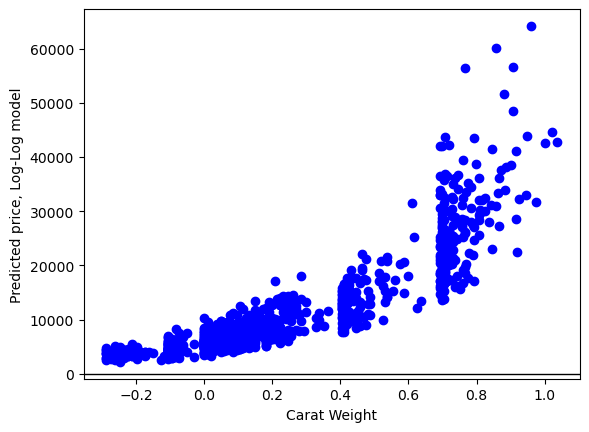

In [34]:
# prompt: create a plot with Y_pred_log on the vertical axis and 'Carat Weight' from X_test data frame on the horizontal

plt.scatter(X_test['Carat Weight'], Y_pred_log, color='blue') # predicted prices vs their carat weights
plt.ylabel('Predicted price, Log-Log model') # vertical axis title
plt.xlabel('Carat Weight') # horizontal axis title
plt.axhline(y = 0, color='black', lw=1)
plt.show


#  WOW -- the log-log model has out-of-sample MAPE of ~ 7.8%

Which of the two models will you choose?



<function matplotlib.pyplot.show(close=None, block=None)>

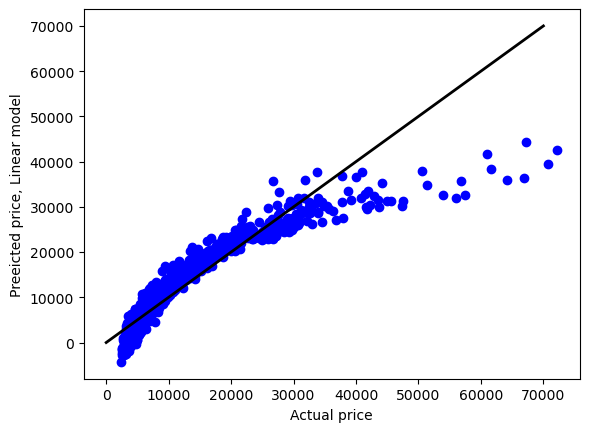

In [35]:
# We can also compare the models' predictions visually by plotting actual vs predicted prices in the testing set. The closer the points are to the 45-degree line, the better the model

# Recall that the plotting package was imported earlier and it is called "plt"

plt.scatter(Y_test, Y_pred, color='blue') # actual vs predicted prices for the linear model
plt.ylabel('Preeicted price, Linear model') # vertical axis title
plt.xlabel('Actual price') # horizontal axis title
plt.plot([0, 70000], [0, 70000], color='black', lw=2) # 45-degree line (at which error = 0)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

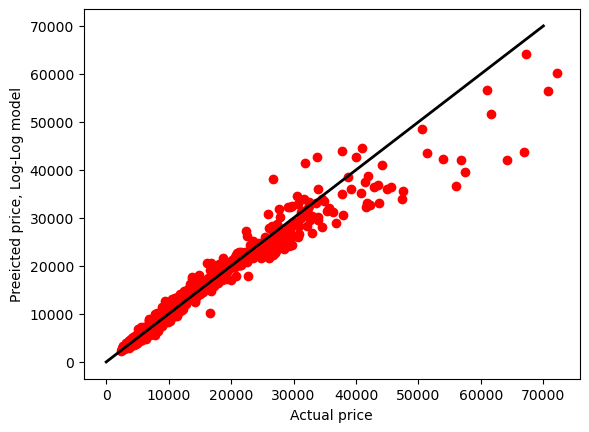

In [36]:
# same for the log-log model:

plt.scatter(Y_test, Y_pred_log, color='red')
plt.ylabel('Preeicted price, Log-Log model')
plt.xlabel('Actual price')
plt.plot([0, 70000], [0, 70000], color='black', lw=2)

plt.show

It is easy to see that the predictions on the second graph are a lot closer to the 45-degree line. The first plot also has negative predicted prices(!) This once again supports that the log-log model is better.

Lastly (while not shown here) you can rebuild the model diagnostic plots and also see that they improve greatly with the log-log model.

# How to improve the model further?

Recall our Tableau visualizations: we observed four effects:

1.   Price increases with Carat Weight -- our model already "learned" that -- Carat Weight is one of the variables, and its coefficient is positive
2.   Price increases exponentially with Carat Weight -- our model already "learned" that with log-log transofrmation. A side note: an equivalent observation is that the dispersion of Prices increases in Carat Weight
3.   Diamonds with "better" colors are more expensive -- our model already "learned" that too: the best ("D") color diamond is in the intercept, and the other Color coefficients are negative
4.   Price increases faster in Carat Weight for the diamonds of "better" colors -- our model has not learned that jet as there is only one coefficient for Carat Weight that does not change with Color ...

How to do the latter? We need to generate new variables ("engineer new features") that would help our model learn that. Such variables ("features") are called "interactions."


In [37]:
# The simplest form of interaction is just multiplying the variables one by another https://en.wikipedia.org/wiki/Interaction_(statistics)

Sarah_data['Carat Weight:Color_E'] = Sarah_data['Carat Weight'] * Sarah_data['Color_E']
Sarah_data['Carat Weight:Color_F'] = Sarah_data['Carat Weight'] * Sarah_data['Color_F']
Sarah_data['Carat Weight:Color_G'] = Sarah_data['Carat Weight'] * Sarah_data['Color_G']
Sarah_data['Carat Weight:Color_H'] = Sarah_data['Carat Weight'] * Sarah_data['Color_H']
Sarah_data['Carat Weight:Color_I'] = Sarah_data['Carat Weight'] * Sarah_data['Color_I']

Sarah_data[0:10] # Check how these variables look

,ID,Carat Weight,Price,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,...,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Carat Weight:Color_E,Carat Weight:Color_F,Carat Weight:Color_G,Carat Weight:Color_H,Carat Weight:Color_I
0,1,0.095310,8.550435,0,1,0,0,0,0,0,...,1,0,0,0,1,0.000000,0.000000,0.00000,0.095310,0.0
1,2,-0.186330,8.151910,0,1,0,0,0,0,0,...,0,0,1,0,0,-0.000000,-0.000000,-0.00000,-0.186330,-0.0
2,3,-0.162519,8.065579,0,1,0,0,0,0,0,...,0,0,0,0,1,-0.000000,-0.000000,-0.00000,-0.162519,-0.0
3,4,-0.094311,8.382518,0,1,0,0,1,0,0,...,1,0,0,1,1,-0.094311,-0.000000,-0.00000,-0.000000,-0.0
4,5,-0.186330,8.061802,0,1,0,0,0,0,1,...,0,0,0,0,1,-0.000000,-0.000000,-0.18633,-0.000000,-0.0
5,6,0.425268,9.456497,0,1,0,0,1,0,0,...,0,0,1,0,0,0.425268,0.000000,0.00000,0.000000,0.0
6,7,0.000000,8.656433,0,0,0,1,0,0,0,...,1,1,0,0,1,0.000000,0.000000,0.00000,0.000000,0.0
7,8,0.405465,9.254357,0,0,0,0,0,1,0,...,1,0,0,1,1,0.000000,0.405465,0.00000,0.000000,0.0
8,9,0.746688,9.831401,0,1,0,0,0,0,0,...,1,0,0,1,1,0.000000,0.000000,0.00000,0.746688,0.0
9,10,0.048790,8.944550,0,0,0,1,1,0,0,...,1,1,0,0,1,0.048790,0.000000,0.00000,0.000000,0.0


In [38]:
# How much better will the model become? Repeat the "trick" with training and testing

train = Sarah_data.iloc[:5000]
test = Sarah_data.iloc[5000:6000]

Y_train = train[(['Price'])]
X_train = train.drop(['ID', 'Price'], axis = 1)

Y_test = np.exp(test[(['Price'])])
X_test = test.drop(['ID', 'Price'], axis = 1)

lm = LinearRegression().fit(X_train, Y_train)

Y_pred_log = np.exp(lm.predict(X_test))

percent_errors = np.abs((Y_test - Y_pred_log) / Y_test) *100

percent_errors[0:4]

print("Log-Log Model with Interactions MAPE = ", np.mean(percent_errors), "%")


Log-Log Model with Interactions MAPE =  Price    7.503237
dtype: float64 %


#  Nice! The MAPE reduced further to ~ 7.5%

Which of the two models will you choose?

What else can we do to further improve the model? Continue feature engineering -- interactions with other variables, higher-degree interactions (e.g., Carat Weight * Color * Cut), aggregating/clustering variables (e.g., Carat Weight > 2), etc.

In [39]:
# To conclude, and to understand the interactions better, lets explore the resultant model coefficients

X_sm = sm.add_constant(X_train)
lm = sm.OLS(Y_train, X_sm.astype(float)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     9484.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:12:48   Log-Likelihood:                 4623.5
No. Observations:                5000   AIC:                            -9189.
Df Residuals:                    4971   BIC:                            -9000.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.3536      0.051    184.793      0.000       9.254       9.453
Carat Weight             2.1472      0.013    171.045      0.000       2.123       2.172
Cut_Good                 0.0490      0.010      4.817      0.000       0.029       0.069
Cut_Ideal                0.1059      0.010     10.596      0.000       0.086       0.125
Cut_Signature-Ideal      0.2494      0.012     20.227      0.000       0.225       0.274
Cut_Very Good            0.0773      0.010      7.960      0.000       0.058       0.096
Color_E                 -0.0667      0.006    -10.752      0.000      -0.079      -0.055
Color_F                 -0.1097      0.006    -18.104      0.000      -0.122      -0.098
Color_G                 -0.1963      0.006    -34.026      0.000      -0.208      -0.185
Color_H                 -0.2953      0.006    -48.130      0.000      -0.307      -0.283
Color_I                 -0.4314      0.006    -67.161      0.000      -0.444      -0.419
Clarity_IF              -0.2296      0.049     -4.660      0.000      -0.326      -0.133
Clarity_SI1             -0.7838      0.049    -16.023      0.000      -0.880      -0.688
Clarity_VS1             -0.5443      0.049    -11.125      0.000      -0.640      -0.448
Clarity_VS2             -0.6233      0.049    -12.741      0.000      -0.719      -0.527
Clarity_VVS1            -0.3454      0.049     -7.022      0.000      -0.442      -0.249
Clarity_VVS2            -0.4178      0.049     -8.529      0.000      -0.514      -0.322
Polish_G                -0.0371      0.006     -6.608      0.000      -0.048      -0.026
Polish_ID                0.0305      0.022      1.380      0.168      -0.013       0.074
Polish_VG               -0.0225      0.004     -6.357      0.000      -0.029      -0.016
Symmetry_G              -0.0242      0.005     -4.603      0.000      -0.035      -0.014
Symmetry_ID             -0.0174      0.023     -0.765      0.444      -0.062       0.027
Symmetry_VG             -0.0202      0.004     -5.391      0.000      -0.028      -0.013
Report_GIA               0.0387      0.010      3.997      0.000       0.020       0.058
Carat Weight:Color_E    -0.1077      0.017     -6.290      0.000      -0.141      -0.074
Carat Weight:Color_F    -0.1034      0.016     -6.389      0.000      -0.135      -0.072
Carat Weight:Color_G    -0.1535      0.015    -10.150      0.000      -0.183      -0.124
Carat Weight:Color_H    -0.2604      0.016    -16.612      0.000      -0.291      -0.230
Carat Weight:Color_I    -0.2926      0.016    -18.010      0.000      -0.324      -0.261
==============================================================================
Omnibus:                      232.556   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              808.02

Observe that interactions changed the model:

Log of Price = 9.356 + 2.14 * Log of Carat Weight + ... - 0.0667 if Color=E ... - 0.1077 * Log of Price if Color=E ...

That is, if Color=Е, the intercept changes from 9.356 to 9.356 - 0.0667, and the coefficient for the (log of) Carat Weight changes from 2.14 to 2.14 - 0.1077. In the previous model (without the interactions) if Color=Е, the intercept did change from 9.44 to 9.44 - 0.0858, but the coefficient for the Carat Weight remained at 1.987.

In other words, because of interactions, the model could "learn" that how Price increases in Carat Weight depends on the Color of the diamond.

In [40]:
# Interactions could also be implemented in sci-kit learn with the package PolynomialFeatures

# from sklearn.preprocessing import PolynomialFeatures # load the package
# poly = PolynomialFeatures(2) # define the object "poly" as a polynomial feature transofrmation of degree 2 (multiply all variables by all variables)
# poly.fit_transform(XYZ) # apply poly to the matrix XYZ (substitute your data matrix instead of XYZ)

# 6. Use the trained model to predict the prices (or "score") the new diamonds

In [41]:
# To finish the work on the case, lets use our last (best) model to predict the prices for IDs>=6001

Sarah_data_prediction = Sarah_data[6000:] # Redfine the pridiction data so that it includes Logs and Interactions

X_pred = Sarah_data_prediction.drop(['ID', 'Price'], axis = 1)

X_pred = sm.add_constant(X_pred)

Predictions = np.exp(lm.predict(X_pred.astype(float)))

Predictions[0:4] # Display first 4 predictions (note, in Python numbers start at 0, hence row "6000" is actually ID 6001)

6000    16313.839238
6001    44690.626719
6002     3664.514017
6003    22965.977867
dtype: float64

# 7. Export the model predictions

In [42]:
Predictions.to_csv("Predicted Diamond Prices LOG INTERACTION.csv",sep = ',') # export the predictions into a CSV file

# Hurray -- we finished the analyses and obtained the predictions!

How good are they? Try oploading to the FAIM course "Sarah Gets a Diamond" Kaggle competition/assignment, and see for yourself...

# Advanced Regressions: regularizations, LASSO and Ridge models

With Big Data and feature engineering, it is not uncommon to have "too many" features. Below we will create them as 3- and 4-way interactions. Ffor example, Carat_Weight * 5 Cuts * 6 Colors * 7 Clarities = 210 new features, the same for log(Carat.Weight) * ... -- 210 additional new features, and so on.

How to create models that could utlize such large feature sets without overfitting?

The key concent is **regularization**: adding a penalty for having too many variables into the model. We will consider two common regularizations: Lasso and Ridge.

In [43]:
# This block of code will creates interactions and model matrix using patsy library

formula = ('ID ~ Carat_Weight * Color * Cut + np.sqrt(Carat_Weight) * Color * Cut + '
           'np.log(Carat_Weight) * Color * Cut + Cut * Color * Clarity + '
           'Cut * Color * Clarity * Polish + Symmetry + Report - 1')

colnames_to_replace = filter(lambda name: ' ' in name, Sarah_raw_data.columns.values)

# We create copies of the dataframe (to not manipulate the original ones)
raw_data = Sarah_raw_data.copy()
numeric_data = Sarah_data.copy()

# Our orignal data contains spaces - replace <space> with _ in column names
raw_data.rename(columns = {col : col.replace(' ', '_') for col in colnames_to_replace}, inplace = True)
numeric_data.rename(columns = {col : col.replace(' ', '_') for col in numeric_data.columns.values}, inplace = True)

# Import patsy
import patsy

only_ids, full_interaction_matrix = patsy.dmatrices(formula, raw_data, return_type='dataframe')

# Remove duplicate columns (so that we can merge the frame)
filtered_numeric_data = numeric_data.drop(columns=[col for col in numeric_data.columns.values if col in full_interaction_matrix.columns.values])

# Merge the dataframes into a single one.
numeric_data  = pd.concat([filtered_numeric_data, full_interaction_matrix], axis=1)

Next we create dataframes with rows where the price is known (`known_data`) and those who requires predictions (`unknown_data`). The dataframe `train_data` contains training set, and `test_data` contains testing set.

In [55]:
# create dataframes with `known_data` and that requiring predictions (`unknown_data`)
known_data = numeric_data[:6000]
unknown_data = numeric_data[6000:]

# split the known data into trainng and testing as we've done before based on ID
train_data = known_data[:5000]
test_data = known_data[5000:]

In [56]:
train_data[0:9]

,ID,Price,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very_Good,Color_E,Color_F,Color_G,Color_H,...,np.log(Carat_Weight):Color[T.E]:Cut[T.Signature-Ideal],np.log(Carat_Weight):Color[T.F]:Cut[T.Signature-Ideal],np.log(Carat_Weight):Color[T.G]:Cut[T.Signature-Ideal],np.log(Carat_Weight):Color[T.H]:Cut[T.Signature-Ideal],np.log(Carat_Weight):Color[T.I]:Cut[T.Signature-Ideal],np.log(Carat_Weight):Color[T.E]:Cut[T.Very Good],np.log(Carat_Weight):Color[T.F]:Cut[T.Very Good],np.log(Carat_Weight):Color[T.G]:Cut[T.Very Good],np.log(Carat_Weight):Color[T.H]:Cut[T.Very Good],np.log(Carat_Weight):Color[T.I]:Cut[T.Very Good]
0,1,8.550435,0,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,8.151910,0,1,0,0,0,0,0,1,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,3,8.065579,0,1,0,0,0,0,0,1,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,4,8.382518,0,1,0,0,1,0,0,0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,5,8.061802,0,1,0,0,0,0,1,0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
5,6,9.456497,0,1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,8.656433,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,9.254357,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,9.831401,0,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
test_data[0:9]

,ID,Price,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very_Good,Color_E,Color_F,Color_G,Color_H,...,np.log(Carat_Weight):Color[T.E]:Cut[T.Signature-Ideal],np.log(Carat_Weight):Color[T.F]:Cut[T.Signature-Ideal],np.log(Carat_Weight):Color[T.G]:Cut[T.Signature-Ideal],np.log(Carat_Weight):Color[T.H]:Cut[T.Signature-Ideal],np.log(Carat_Weight):Color[T.I]:Cut[T.Signature-Ideal],np.log(Carat_Weight):Color[T.E]:Cut[T.Very Good],np.log(Carat_Weight):Color[T.F]:Cut[T.Very Good],np.log(Carat_Weight):Color[T.G]:Cut[T.Very Good],np.log(Carat_Weight):Color[T.H]:Cut[T.Very Good],np.log(Carat_Weight):Color[T.I]:Cut[T.Very Good]
5000,5001,9.005896,0,1,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
5001,5002,8.810460,0,1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
5002,5003,9.518046,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
5003,5004,8.404248,0,0,0,1,0,0,0,0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.000000
5004,5005,9.545669,0,0,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.553885,0.0,0.0,0.000000
5005,5006,10.065564,0,1,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
5006,5007,9.258845,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.470004
5007,5008,10.209979,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
5008,5009,8.691315,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [58]:
# create y-vectors and X-matrices for training and testing (as before)

y_train = np.array(train_data['Price'])
X_train = train_data.drop(['ID', 'Price'], axis=1)

y_test = np.array(test_data['Price'])
X_test = test_data.drop(['ID', 'Price'], axis=1)

In [59]:
X_train[0:9]

,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very_Good,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_IF,...,np.log(Carat_Weight):Color[T.E]:Cut[T.Signature-Ideal],np.log(Carat_Weight):Color[T.F]:Cut[T.Signature-Ideal],np.log(Carat_Weight):Color[T.G]:Cut[T.Signature-Ideal],np.log(Carat_Weight):Color[T.H]:Cut[T.Signature-Ideal],np.log(Carat_Weight):Color[T.I]:Cut[T.Signature-Ideal],np.log(Carat_Weight):Color[T.E]:Cut[T.Very Good],np.log(Carat_Weight):Color[T.F]:Cut[T.Very Good],np.log(Carat_Weight):Color[T.G]:Cut[T.Very Good],np.log(Carat_Weight):Color[T.H]:Cut[T.Very Good],np.log(Carat_Weight):Color[T.I]:Cut[T.Very Good]
0,0,1,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0,0,1,0,0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,0,1,0,0,0,0,0,1,0,0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,0,1,0,0,1,0,0,0,0,0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,0,1,0,0,0,0,1,0,0,0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
5,0,1,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,1,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
y_train[0:9]

array([8.55043453, 8.15190987, 8.06557943, 8.38251829, 8.06180227,
       9.45649708, 8.65643326, 9.25435726, 9.83140061])

To fully appreciate the power of regularization, lets train a model (on this data with very many features) and computes MAPE for it.

In [61]:
# Statsmodels does not add intercept by default, so let us explicitly require it.
X_train_sm = pd.DataFrame(sm.add_constant(X_train), dtype=float)

ols_sm = sm.OLS(y_train, X_train_sm).fit() # Fit linear regression (ordinary least squares).
ols_sm.summary() # Summary of model results.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     747.1
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:15:28   Log-Likelihood:                 5828.1
No. Observations:                5000   AIC:                        -1.061e+04
Df Residuals:                    4477   BIC:                            -7202.
Df Model:                         522                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
const                                                          -4.227e+09   1.38e+10     -0.306      0.760   -3.13e+10    2.29e+10
Cut_Good                                                       -5.527e+09   2.18e+10     -0.254      0.800   -4.83e+10    3.72e+10
Cut_Ideal                                                       5.806e+10   4.37e+10      1.329      0.184   -2.76e+10    1.44e+11
Cut_Signature-Ideal                                             5.447e+09   8.63e+09      0.631      0.528   -1.15e+10    2.24e+10
Cut_Very_Good                                                   9.169e+08   7.85e+09      0.117      0.907   -1.45e+10    1.63e+10
Color_E                                                        -1.545e+11   1.42e+11     -1.088      0.277   -4.33e+11    1.24e+11
Color_F                                                         4.998e+10   7.02e+10      0.712      0.476   -8.76e+10    1.88e+11
Color_G                                                        -4.031e+09   1.17e+10     -0.346      0.730   -2.69e+10    1.88e+10
Color_H                                                        -6.252e+09   1.12e+10     -0.557      0.578   -2.83e+10    1.58e+10
Color_I                                                        -9.381e+09   1.37e+10     -0.683      0.495   -3.63e+10    1.75e+10
Clarity_IF                                                      1.853e+09   4.88e+09      0.380      0.704   -7.71e+09    1.14e+10
Clarity_SI1                                                    -3.831e+10   1.72e+11     -0.223      0.823   -3.75e+11    2.98e+11
Clarity_VS1                                                     1.402e+09   2.13e+11      0.007      0.995   -4.16e+11    4.19e+11
Clarity_VS2                                                     7.047e+09   7.41e+09      0.952      0.341   -7.47e+09    2.16e+10
Clarity_VVS1                                                    3.778e+09   4.71e+09      0.803      0.422   -5.45e+09     1.3e+10
Clarity_VVS2                                                    4.758e+09   1.36e+10      0.349      0.727    -2.2e+10    3.15e+10
Polish_G                                                        5.012e+09    4.7e+09      1.067      0.286    -4.2e+09    1.42e+10
Polish_ID                                                       2.935e+09   6.18e+09      0.475      0.635   -9.19e+09    1.51e+10
Polish_VG                                                           6e+09   5.55e+09      1.082      0.279   -4.87e+09    1.69e+10
Symmetry_G                                                      1.502e+09   5.21e+09      0.288      0.773   -8.72e+09    1.17e+10
Symmetry_ID                                                      1.15e

In [62]:
y_test[0:9]

array([ 9.0058959 ,  8.81045964,  9.51804564,  8.40424843,  9.5456691 ,
       10.06556388,  9.25884478, 10.20997911,  8.69131455])

In [63]:
X_test_sm = pd.DataFrame(sm.add_constant(X_test), dtype=np.float64)
y_pred_sm = np.array(ols_sm.predict(X_test_sm), dtype=np.float64)

y_pred_sm[0:9]

array([ 8.92298975,  8.79799977,  9.30909072,  8.40830292,  9.61758394,
       10.07234774,  9.26754116, 10.09838943,  8.68272434])

In [64]:
percent_errors = np.abs((np.exp(y_test) - np.exp(y_pred_sm)) / np.exp(y_test)) * 100

# Our percent errors might include inf if y_test is zero -> will distort the mean (make it infinite too)
print("Base-case LASSO Model MAPE = ", np.mean(percent_errors[np.isfinite(percent_errors)]).round(5), "%")

Base-case LASSO Model MAPE =  7.8889 %


So, by adding very many new interaction features we decreased MAPE from ~7.5% to about 7.37% -- not bad, but can be better (as we will see soon). This is because to many of these new feature are useless. A model can become better if we reduce their impact.

## Regularization method #1: Lasso

In [65]:
# Lasso regression has a regularization/complexity hyper-parameter, lambda [although in sklearn it is referred to as alpha ~ a bit confusing, we know]
# Here we explore how the model coefficients depend on lambda

# First we calculate the coefficients

from sklearn.linear_model import Lasso

# Define a range of regularization parameters
lambdas = np.logspace(-15, 0, base = 2.71828, num = 40)

# Initialize a Lasso regression model with a moderate maximum number of iterations to balance convergence with speed
lasso = Lasso(max_iter=100)

# Initialize a list to store the coefficients for each alpha
coefs_lasso = []
significant_coefs = []

# For each alpha in our list
for a in lambdas[::]:
    # Set the current alpha to our Lasso model
    lasso.set_params(alpha=a)
    # Fit the model with the training data
    lasso.fit(X_train_sm, y_train)
    # Append the coefficients of the model to our list
    coefs_lasso.append(lasso.coef_)
    significant_coefs.append(np.sum(lasso.coef_ != 0))


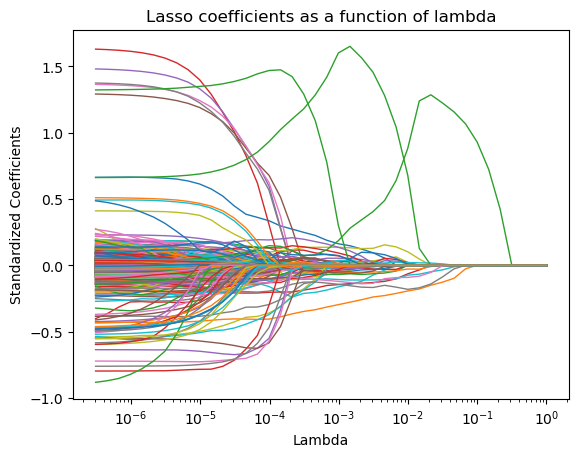

In [66]:
# Second we plot the coefficients

# Get the current axes instance on the current figure
ax = plt.gca()

# Plot alpha values (regularization parameters) against coefficients
ax.plot(lambdas, coefs_lasso, linewidth=1)
#ax2 = ax.twiny()

# Set x axis scale to logarithmic
ax.set_xscale('log')

# Set limits of x and y axes to fit data tightly within the plot
plt.axis('tight')

# Label x and y axes and set the plot title
plt.xlabel('Lambda')
plt.ylabel('Standardized Coefficients')
# ax2.set_xlabel('No. Parameters')
plt.title('Lasso coefficients as a function of lambda')

plt.show()

In [67]:
# Third, we print the numbers of non-zero coefficients at each tested value of lambda
significant_coefs

[749,
 740,
 721,
 704,
 673,
 653,
 627,
 582,
 541,
 486,
 444,
 391,
 326,
 259,
 213,
 175,
 143,
 115,
 88,
 69,
 61,
 49,
 44,
 40,
 34,
 33,
 20,
 17,
 10,
 7,
 6,
 5,
 3,
 1,
 1,
 1,
 0,
 0,
 0,
 0]

In [68]:
# Fourth, we print the variable names by their 'peak importance' at a given value of lambda grid (recall, we tested 40 values stored in array called lambdas)

# set the regularization hyperparemeter value to one of the grid points we tested
lasso.set_params(alpha = lambdas[32])
# Fit the model with the training data
lasso.fit(X_train_sm, y_train)

# Create a dataframe with the names of the variables, their coefficient values, the absolute values of the coefficients (for sorting)
coeffs_values = pd.DataFrame(lasso.coef_) # print the coefficients. The resultant dataframe will have no names (just variable numbers in lexicographic order)
coeffs_values.index = X_test_sm.columns # prompt: rename the rows in coeffs_values to the names of columns in X_test_sm
coeffs_values['abs_coeff'] = np.abs(coeffs_values[0]) # add a column of absolute values of the coefficients for sorting
coeffs_values.rename(columns={0: 'coeff'}, inplace=True) # raneme the coefficients column (currently called 0) to "coeff"

# prompt: sort coeffs_values by the value in column abs_coeff and print the top five values
coeffs_values.sort_values(by=['abs_coeff'], ascending=False).head(5)[['coeff']]

,coeff
Carat_Weight,1.065315e+00
Clarity_SI1,-2.717242e-02
Clarity[T.SI1],-5.044878e-16
Cut[T.Signature-Ideal]:Color[T.H]:Clarity[T.IF]:Polish[T.ID],0.000000e+00
Cut[T.Signature-Ideal]:Color[T.E]:Clarity[T.IF]:Polish[T.ID],0.000000e+00


## Optimizing Lasso regularization/complexity hyper-parameter, lambda

In [70]:
# Optimize lambda using 5-fold cross-validation with LassoCV command from the sklearn library

from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=lambdas, cv=5)
lasso_cv.fit(X_train_sm, y_train)

lasso_alpha = lasso_cv.alpha_
print("Optimal lambda for Lasso: ", lasso_alpha)

Optimal lambda for Lasso:  4.540023514737345e-05


The optimal value of lambda is ~4.54 * 10^-5. Let's now plot how the model performance depend on lambda and visualize the optimal value

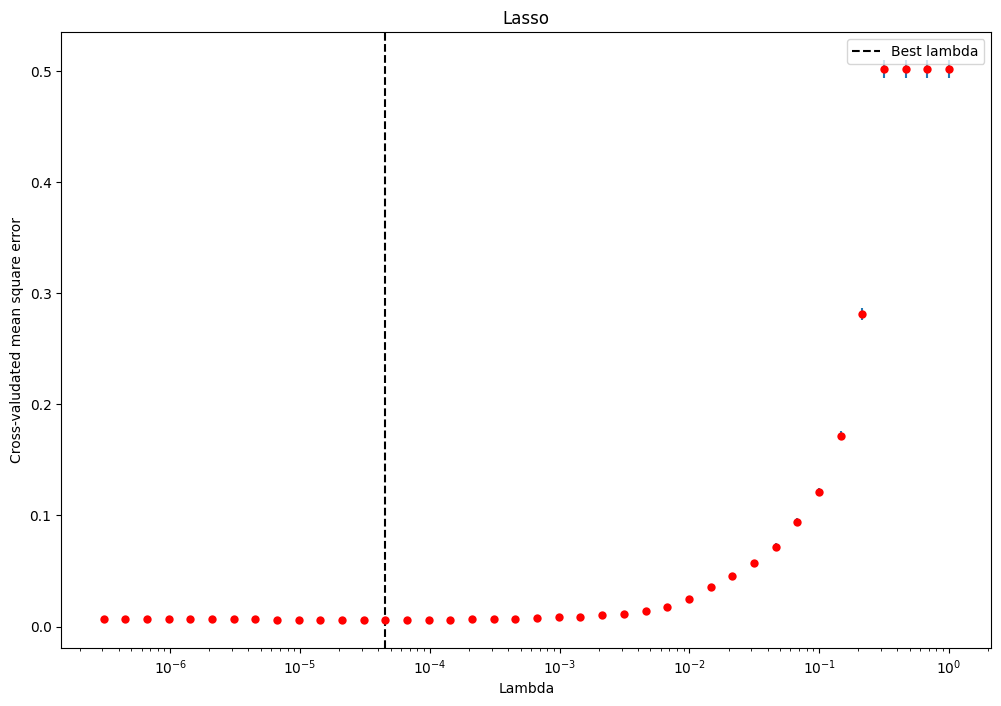

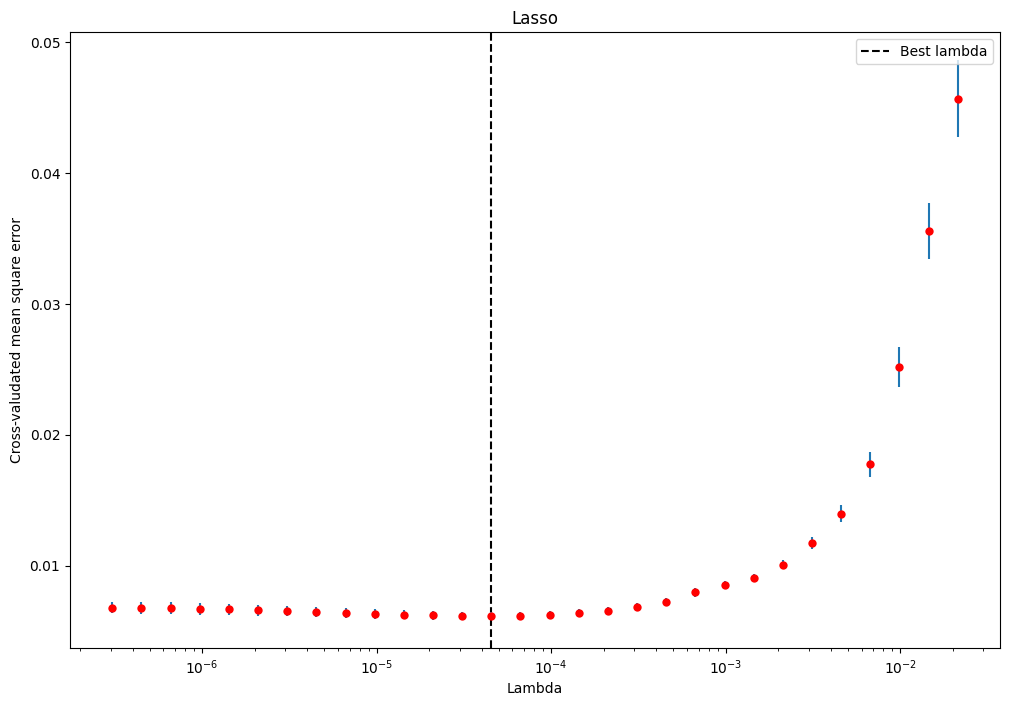

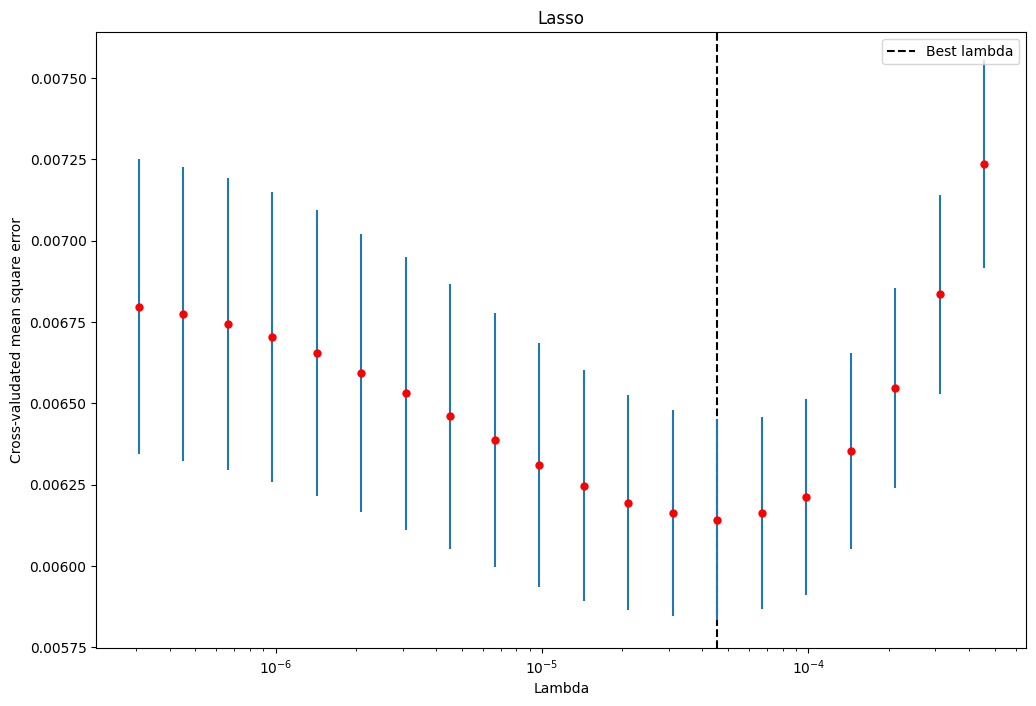

In [78]:
# We plot the average model error and 95% confidence interval acorss folds for the tested values of lambda

# Calculate standard error of the mean for each alpha, multiply by 1.96 for 95% confidence intervals
standard_errors = (np.std(lasso_cv.mse_path_, axis=-1) / np.sqrt(lasso_cv.mse_path_.shape[1])) * 1.96

# We plot 3 graphs
for start in [0, 10, 20]:
    # Create the graph
    fig = plt.figure(figsize=(12, 8))
    axis1 = fig.add_subplot(111)

    # Use log as the xscale measurement
    axis1.set_xscale('log')

    # Plot the highest confidence line
    axis1.axvline(lasso_cv.alpha_, linestyle='--', color='k', label='Best lambda')
    plt.legend()

    # Plot error bars
    plt.errorbar(lasso_cv.alphas_[start:], lasso_cv.mse_path_.mean(axis=-1)[start:], yerr=standard_errors[start:], mfc='red',mec='none', markersize=6, linestyle="none", fmt='o')

    # Axes labels
    axis1.set_xlabel('Lambda')
    plt.ylabel('Cross-valudated mean square error')
    plt.title('Lasso')
    plt.show()

The dashed verticle line depicts the optimal lambda, which appears at 14th spot in our grid, corresponding to a model with ~250 variables (out of ~960 intially created)

In [71]:
# lets finally check how good the new model is?

y_pred_cv_lasso_opt: np.array = lasso_cv.predict(X_test_sm)

percent_errors = np.abs((np.exp(y_test) - np.exp(y_pred_cv_lasso_opt)) / np.exp(y_test)) * 100

print("Optimized LASSO Model MAPE = ", np.mean(percent_errors), "%")

Optimized LASSO Model MAPE =  6.3052864326657305 %


## WOW -- MAPE is 6.3% -- a large improvement!

## Regularization method #2: Ridge

The steps are essentially identical to Lasso, hence there are fewer comments and explanations

Text(0.5, 1.0, 'Ridge coefficients as a function of lambda')

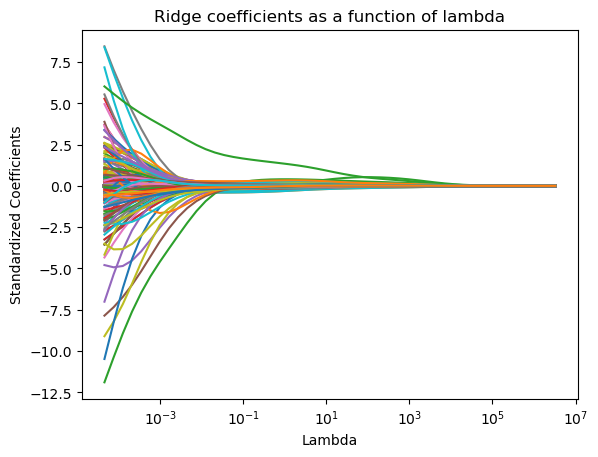

In [72]:
# Ridge regression has a regularization hyper-parameter, lambda [although in sklearn it is referred to as alpha ~ a bit confusing, we know]
# Here we explore how the model coefficients depend on lambda

from sklearn.linear_model import Ridge

# Define a range of alpha values (regularization parameters)
lambdas = np.logspace(-10, 15, base = 2.71828, num = 50)

# Initialize a Ridge regression model
ridge = Ridge()

# Initialize a list to store the coefficients for each alpha
coefs_ridge = []

# For each alpha in our list
for a in lambdas:
    # Set the current alpha to our Ridge model
    ridge.set_params(alpha=a)
    # Fit the model with the training data
    ridge.fit(X_train_sm, y_train)
    # Append the coefficients of the model to our list
    coefs_ridge.append(ridge.coef_)

# Get the current axes instance on the current figure
ax = plt.gca()

# Plot alpha values (regularization parameters) against coefficients
ax.plot(lambdas, coefs_ridge)

# Set x axis scale to logarithmic
ax.set_xscale('log')

# Set limits of x and y axes to fit data tightly within the plot
plt.axis('tight')

# Label x and y axes and set the plot title
plt.xlabel('Lambda')
plt.ylabel('Standardized Coefficients')
plt.title('Ridge coefficients as a function of lambda')

The main observation is that Lasso 'zeros' out coefficnts of unimpactful variables, while Ridge suppressess them to small values.

In [75]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=lambdas, cv=5)  # 5-fold cross-validation
ridge_cv.fit(X_train_sm, y_train)

ridge_alpha = ridge_cv.alpha_
print("Optimal lambda for Ridge: ", ridge_alpha)

Optimal lambda for Ridge:  0.7362966068001725


In [78]:
y_pred_cv_ridge_opt: np.array = ridge_cv.predict(X_test_sm)

percent_errors = np.abs((np.exp(y_test) - np.exp(y_pred_cv_ridge_opt)) / np.exp(y_test)) * 100

print("Optimized Ridge Model MAPE = ", np.mean(percent_errors), "%")

Optimized Ridge Model MAPE =  6.329463114558195 %


# In sum:

We added many 3- and 4-way interactions, and through regularizations reduced the test set MAPE from ~7.5 to about 6.3%. Why did the MAPE improve? Because with too many interactions the model was overfit, and with regularizations we reduced overfitting. For example, with LASSO at the optimal regularization hyperparameter (lambda), the number of non-zero coefficient variables reduced from ~950 to ~250; equivalently, the model selected ~250 out of ~950 varibles, while removing ~700 ones that were not particularly hepful.

With more interactions and engineered features (specifically, breakpoints in Carat Weight that we observed in Tableau) it is possible to reduce the error further. Moreso, a combination of Lasso and Ridge is also possible; it is called "Elastic Net."

Good luck!